# HomeWork 9

**DeadLine : 23:59 19 Azar 1401**

**Total points : 100pts**


Import some prerequisites:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils

Run this cell for plotting.

In [2]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

# PART 3

**Point : 35 pts**

Here is for your helper functions(optional).

Implement this function to get the input image and return the skeleton of the input image.

In [ ]:
def get_skeleton(image):
    """
    Finds the skeleton of the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The skeleton image.  
        numpy.ndarray: The parameters required for reconstructing image
    """
    
    res = image.copy()
    params = None
    
    #Write your code here

    params = []
    structural_element = np.ones((3,3))
    Sum = np.zeros((image.shape))
    binary_image = cv2.threshold(image, 230, 255, cv2.THRESH_BINARY)[1]
    binary_image = cv2.bitwise_not(binary_image)
    
    Sk = []
    k = 0
    while True:
        Open = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, structural_element)
        Sk = binary_image - Open
        Sum = Sk + Sum
        if np.all(Open == 0):
            break
        k += 1
        binary_image = cv2.erode(binary_image, structural_element)
        params.append(Sk)
        
    res = 1 - Sum
    
    
    return res, params

Test your implementation (don't change this cell).

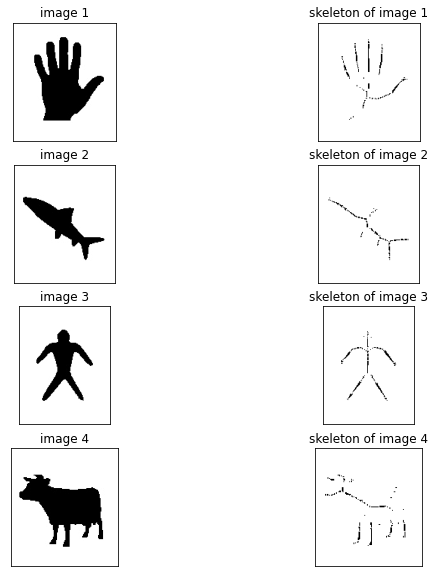

In [ ]:
image_list = []

image1 = cv2.imread('img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_skeleton, params1 = get_skeleton(image1)
image_list.append([image1_skeleton, 'skeleton of image 1','img'])

image2 = cv2.imread('img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_skeleton, params2 = get_skeleton(image2)
image_list.append([image2_skeleton, 'skeleton of image 2','img'])

image3 = cv2.imread('img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_skeleton, params3 = get_skeleton(image3)
image_list.append([image3_skeleton, 'skeleton of image 3', 'img'])

image4 = cv2.imread('img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_skeleton, params4 = get_skeleton(image4)
image_list.append([image4_skeleton, 'skeleton of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q3-a')

Implement this function to get the input image as skeleton and return the reconstruction of the skeleton.

In [ ]:
def recons_skeleton(image, params):
    """
    Finds the original image from the skeleton.
    
    Parameters:
        image (numpy.ndarray): The skeleton of image.
        params (numpy.ndarray): The parameters required for reconstructing image
    
    Returns:
        numpy.ndarray: The original image.  
    """
    
    res = image.copy()
    
    #Write your code here
    
    structural_element = np.ones((3,3))
    Sum = np.zeros((image.shape))
    
    for k, Sk in enumerate(params):
      erode = cv2.bitwise_not(Sk)
      for i in range(k):
        erode = cv2.erode(erode, structural_element)
      Sum = erode + Sum
        
    res = cv2.threshold(Sum, np.max(Sum) - 1, 1, cv2.THRESH_BINARY)[1]
    # res = Sum
    # print(np.unique(res))
    return res

Test your implementation (don't change this cell).

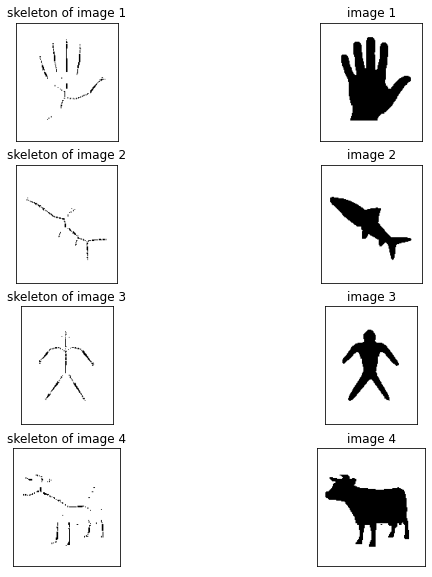

In [ ]:
image_list = []

image_list.append([image1_skeleton, 'skeleton of image 1', 'img'])
image_list.append([recons_skeleton(image1_skeleton, params1), 'image 1','img'])

image_list.append([image2_skeleton, 'skeleton of image 2', 'img'])
image_list.append([recons_skeleton(image2_skeleton, params2), 'image 2','img'])

image_list.append([image3_skeleton, 'skeleton of image 3', 'img'])
image_list.append([recons_skeleton(image3_skeleton, params3), 'image 3', 'img'])

image_list.append([image4_skeleton, 'skeleton of image 4', 'img'])
image_list.append([recons_skeleton(image4_skeleton, params4), 'image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q3-b')

# PART 4

**Point : 30 pts**

Here is for your helper functions(optional).

In [3]:
def show(image, cmap=None):
  plt.imshow(image, cmap=cmap)
  plt.show()

Implement this function to detect shapes and number of cars in an input image.

In [ ]:
def detect_car_num(image):
    '''
    Detects shapes and number of cars in the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
        integer: number of cars
    '''
    
    result = image.copy()
    cars_num = None
    
    #Write your code here

    blurred = cv2.GaussianBlur(image, (3, 3), 0)
    # show(blurred)

    gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
    # show(gray, 'gray')

    # thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 225, 1)
    # show(thresh, 'gray')

    structural_element = np.ones((17, 15))
    open = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, structural_element)
    # show(open, 'gray')

    structural_element = np.ones((20, 30))
    close = cv2.morphologyEx(open, cv2.MORPH_CLOSE, structural_element)
    # show(close, 'gray')

    structural_element = np.ones((13, 13))
    dilate = cv2.dilate(close, structural_element)
    show(dilate, 'gray')

    # find contours in the thresholded image
    cnts = cv2.findContours(dilate.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cars_num = len(cnts)

    for c in cnts:
        # draw the contours on the image
        c = c.astype("int")
        cv2.drawContours(result, [c], -1, (255, 0, 0), 2)  
    
    print('cars num: ', cars_num)
    return result,cars_num

Test your implementation (don't change this cell).

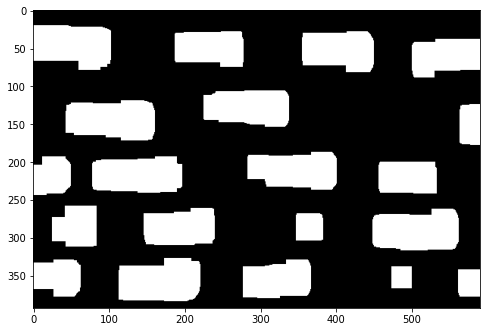

cars num:  20


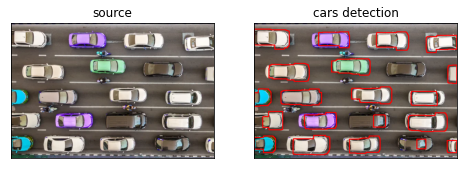

In [ ]:
image_list = []
image = cv2.imread('img5.jpg', cv2.IMREAD_COLOR)
image_list.append([image, 'source', 'img'])
image_list.append([detect_car_num(image)[0], 'cars detection', 'img'])
plotter(image_list, 1, 2, True, 8, 6, 'Q4-a')
# cv2.imwrite('cars_num.png', detect_car_num(image)[0])

Implement this function to detect shapes and number of flowers in an input image.

In [105]:
def detect_flower_num(image):
    '''
    Detects shapes and number of flowers in the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
        integer: number of flowers
    '''
    
    result = image.copy()
    flowers_num = None
    
    #Write your code here
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    mask = cv2.inRange(hsv, (105, 24, 24), (114, 255 ,255))
    flowers = cv2.bitwise_and(img,img, mask= mask)
    # show(flowers)
    
    # red, green, blue = img[:,:,0], img[:,:,1], img[:,:,2]
    # show(green, 'gray')
    # show(blue, 'gray')

    structural_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(4,4))
    # open = cv2.morphologyEx(red, cv2.MORPH_OPEN, structural_element)

    open = cv2.morphologyEx(flowers, cv2.MORPH_OPEN, structural_element)
    # show(open)

    structural_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
    close = cv2.morphologyEx(open, cv2.MORPH_CLOSE, structural_element)
    # show(close)

    erode = cv2.erode(close, structural_element)
    # show(erode)

    structural_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
    dilate = cv2.dilate(erode, structural_element)
    show(dilate)

    gray = cv2.cvtColor(dilate, cv2.COLOR_RGB2GRAY)
    # show(gray, 'gray')
    
    # find contours in the thresholded image
    cnts = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    flowers_num = len(cnts)

    for c in cnts:
        # draw the contours on the image
        c = c.astype("int")
        cv2.drawContours(result, [c], -1, (255, 0, 0), 2)  
    
    print('flowers num: ', flowers_num)
    
    return result,flowers_num

Test your implementation (don't change this cell).

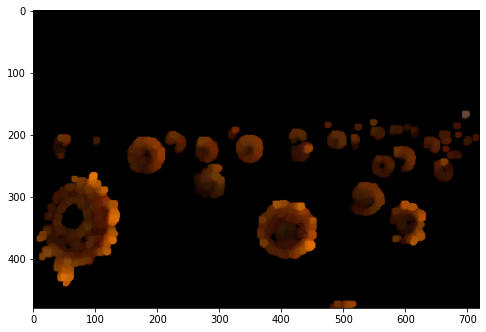

flowers num:  33


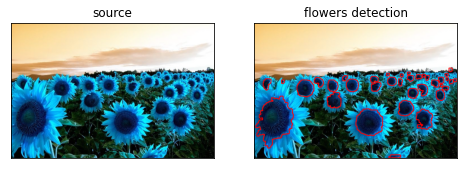

In [106]:
image_list = []
image = cv2.imread('img6.jpg', cv2.IMREAD_COLOR)
image_list.append([image, 'source', 'img'])
image_list.append([detect_flower_num(image)[0], 'flowers detection', 'img'])
plotter(image_list, 1, 2, True, 8, 6, 'Q4-b')
# cv2.imwrite('flowers_num.png', detect_flower_num(image)[0])

End!!!